# Session 7 - Plotting
$\require{mhchem}$
*Dr James Cumby (james.cumby@ed.ac.uk)*

In [2]:
import numpy as np
import pandas as pd
import mendeleev

import sys
import os.path
sys.path.append(os.path.abspath('../'))
from helper_modules.mentimeter import Mentimeter

# Introduction
> A picture is worth a thousand words

A lot of scientific data is numerical, but people are typically very bad at understanding a list of numbers! As such, the graph (or more generally plot, as we'll call it here) is the main technique we have for (a) understanding our data and (b) helping other people to understand it. This extends far beyond images in scientific reports or publications; if you look at any [infographic](https://www.google.com/search?q=chemistry+infographic&tbm=isch), chances are that it has some numerical data on it!

![Polar Area Plot](./images/polar_area_plot.jpg)

Design of high quality scientific plots is a course in itself, but there are a few [key considerations](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) to making eye-catching and informative figures: 
- Know what you want the figure to convey and stick to this message.
    - Are the important features standing out?
    - Do the colours (if any) highlight the parts you want them to?
- Choose the right type of plot for the data involved
    - If the data fall into categories, don't plot them as continuous (e.g. a line plot)
- Focus on clarity
    - Are the colours distinguishable, even for the colour-blind?
    - Can you read the text?
    - If you print it in black and white, does it still work?
    - Are the lines thick enough?
        - Note that these choices depend on whether the figure is for a report, presentation or poster
    - Is the figure misleading in any way?
- Keep plots simple, and don't be afraid of empty space!


Above all, if it doesn't add to the points above, why is it there (avoid 'chartjunk')? 

# Plot types
Throughout this course, you have seen a combination of plots including line graphs, scatter plots and statistical diagrams. The first question you should ask when displaying your data is which type of plot to use? The most important consideration is whether your data are continous (i.e. can take any value) or categorical (e.g. red, blue, green etc). This will help to decide which plot is most appropriate; generally line or scatter plots for continous data, and bar charts for discrete data. The following gives a reasonable flow-chart for deciding on a plot type (but be aware that others exist).
![Choosing a plot type](./images/choosing_a_good_plot.png)

## Plot types - Summary

-----------------
Data Type   | Number of Variables | Type of plot
------------|---------------------|--
Numerical (continuous)   | 1                   |Histogram
            | 2                   | Scatter or line
            | 3                   | Would multiple plots be better?
Categorical | 1                   | Bar or column graph
            | 2                   | Stacked or multiple columns
            | 3 or more           | Consider carefully...


# Task 1 - What plots should we use?
In the following, vote which type of plot would be display the correlation between the variables.

## A: Correlation between height and hat size
How could you best represent the correlation (if any) between a person's height and their hat size?

In [3]:
Mentimeter(vote = 'https://www.menti.com/fdra9riraa').show()

<!-- begin answer -->
![Height vs hat size results](https://static.mentimeter.com/screenshot/1-how-does-height-affect-hat-size.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F0893f5de7d94c4d6b1b6c845e2145946%2F0191ab6ed70b%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)
<!-- end answer -->

## B: Link between Annual income and type of pet owned
How could you display the correlations (if any) between the type of pet somebody owns and their annual income?

In [6]:
Mentimeter(vote = 'https://www.menti.com/ow1rtn6oes').show()


<!-- begin answer -->
![Annual income vs pet results](https://static.mentimeter.com/screenshot/1-link-between-annual-income-and-type-of-pet.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F1622edbe51a18da166f7c39d4cfaf146%2Ff2a14846f88d%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)
<!-- end answer -->

## C: Variation of pH of a reaction with time
What graph would best show how the pH of a reaction varies with time?

In [9]:
Mentimeter(vote = 'https://www.menti.com/kke5cc4x3p').show()


<!-- begin answer -->
![pH of reaction vs time vote](https://static.mentimeter.com/screenshot/1-correlating-ph-of-reaction-against-time.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F2d81210e197cad6b50b52eb47a78ee22%2Fd9c216eac980%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)
<!-- end answer -->

## D: Drug stability
How would you best display the time a drug molecule remains stable at various temperature and pressure conditions?

In [12]:
Mentimeter(vote = 'https://www.menti.com/eg68jivckx').show()


<!-- begin answer -->
![drug stability with temperature and pressure vote results](https://static.mentimeter.com/screenshot/1-length-of-time-a-drug-molecule-can-withstand-a-given-ph-and-temperature.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F46b618f3519a1c9a10d2d8f640e9cb01%2F4ce7a29cc43d%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)
<!-- end answer -->

# Plotting with Python - Matplotlib

Matplotlib is one of the main python packages for plotting graphs. [<sup>1</sup>](#fn_matplotlib)<span id=rt_matplotlib></span> It is widely supported (and has lots of internet help), and works in lots of different python environments.

Matplotlib may initially feel like hard work to generate a single plot compared to other software you may have used such as Excel or Origin. For very simple plots this may be true, but the real power of Matplotlib is that you can customise *anything* on the plot, and create some really complex visualisations which would be impossible/very difficult to achieve with other programs. What is more, these customisations can be saved to a file (see later) which can ensure that all plots you make will look similar. Another benefit is that if you decide to change something (e.g. the width of each line) this can be achieved with just a few lines of code, whereas a similar process in Excel would require manually selecting each line in turn. As is often the case, programming is a balance between long-term efficiency and short-term time expense!


## Importing Matplotlib
To use it, we must first import (bits of) matplotlib. The main interface to the package is `pyplot`, which by convention is imported as `plt`. To make plots appear inside the Jupyter notebook, we also have to configure matplotlib using a Jupyter 'magic' command (denoted by %): 


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib terminology

Matplotlib is built around two main objects; **axes** (which are the 'plot' areas where you draw lines, points and have scalebars etc.) and **figures** (which are like the paper on which everything is drawn). A figure can hold multiple axes. Within a set of axes, most types of plot have two directions (abscissa and ordinate) which are known as an axis (x-axis and y-axis, respectively).


![Matplotlib figure layout](./images/matplotlib_figure_layout.png)    

## A note on the matplotlib interface

Matplotlib is designed to give two approaches to generating plots:
1. Save the figure and its axes to variables, and then modify them (the 'Object-oriented' approach)
    ``` python
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(x, y)
    ```
2. Use commands to modify the most recent figure or axes (the 'stateless' approach)
    ``` python
    plt.plot(x,y)
    ```
    
Both approaches are useful; (1) is more 'Pythonic' and makes it easy to modify parts of a plot at a later date, while (2) often requires fewer lines of code.[<sup>2</sup>](#fn_matlab)<span id=rt_matlab></span> The internet contains examples of both, and as long as they produce the plot you want it doesn't really matter! As a general rule though, it is a bad idea to mix them within a single project/notebook (as it can cause problems).


In this session, we will focus on version (1)as it is the more general approach (and (2) is effectively performing the steps of (1) in the background).

The general process to create a plot is therefore:
1. create a figure to hold everything
2. place axes within the figure where you want them
3. Plot your data on the appropriate axes
4. Customise the axes with text annotations, additional shapes, a legend, different fonts etc...
5. Save your plot to a file for use in a report
    - If you're using a Jupyter notebook to hold everything, this may not be required.
    

# Effect of Plot layout
Once you have decided on a type of plot, the next (but often ignored) step is to determine the size of the figure. For a single plot this is a simple as deciding on the aspect ratio (height/width), while for multi-part figures you need to choose not only aspect ratio but also layout. 

Although it is common to use the default figure size of whichever software you are using, it can have a huge impact on how the results are perceived, particularly when showing data trends. 


## Example - Atmospheric CO<sub>2</sub>
If we plot the variation of globally-averaged $\ce{CH4}$ levels in the atmosphere over time, we can see the effect of differing aspect ratios on the same data.

In [11]:
# Read data from NOAA. See https://www.esrl.noaa.gov/gmd/ccgg/trends_ch4/ for more details
CH4dat = pd.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/ch4/ch4_mm_gl.txt',
                       sep='\s+',
                       comment='#',
                       names=['year','month','decimal','average','average_unc','trend','trend_unc'])
# Assume data are collected on the first day of the month for simplicity
CH4dat['day'] = 1

# Pandas can handle date formats nicely, so we'll convert it here
CH4dat['date'] = pd.to_datetime(CH4dat[['year', 'month', 'day']])

CH4dat.head()

year  month   decimal  average  average_unc   trend  trend_unc  day  \
0  1983      7  1983.542   1626.0          2.3  1634.9        1.5    1   
1  1983      8  1983.625   1628.1          2.9  1635.5        1.4    1   
2  1983      9  1983.708   1638.4          2.3  1636.1        1.3    1   
3  1983     10  1983.792   1644.8          1.4  1636.8        1.2    1   
4  1983     11  1983.875   1642.6          0.8  1637.6        1.2    1   

        date  
0 1983-07-01  
1 1983-08-01  
2 1983-09-01  
3 1983-10-01  
4 1983-11-01

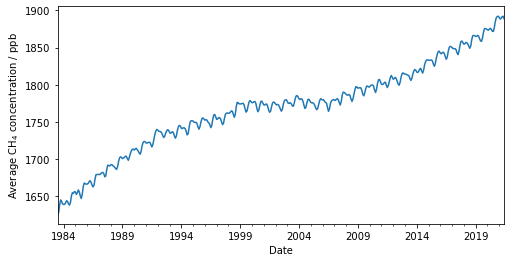

In [12]:
fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot()
# Use the Pandas plotting approach
CH4dat.plot(x='date',y='average', ax=ax1, legend=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average CH$_4$ concentration / ppb')
fig1.savefig('images/landscape_CH4.png')


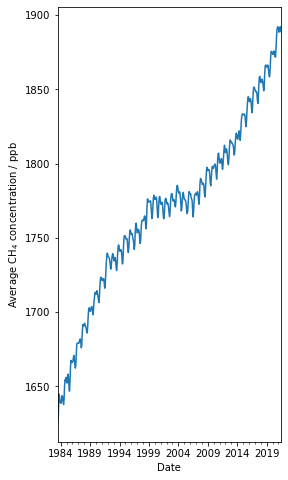

In [13]:
fig2 = plt.figure(figsize=(4,8))
ax2 = fig2.add_subplot()
CH4dat.plot(x='date',y='average', ax=ax2, legend=False)
ax2.set_xlabel('Date')
ax2.set_ylabel(r'Average CH$_4$ concentration / ppb')
fig2.savefig('images/portrait_CH4.png')


The first (landscape) plot emphasises the monthly variations in $\ce{CH4}$ concentration, whilst suppressing the effect of the gradual change over time. In contrast, the portrait plot hides much of the monthly detail, but dramatically shows the increase in $[\ce{CH4}]$ since 1984. Depending on who you were presenting this data to, you might want to choose either option (e.g. the best time of year to store methane from the atmosphere *vs.* talking about climate change to politicians). 


# How to Plot
This may sound like a pointless section, but there are actually multiple ways to generate plots! 
So far you have seen how to plot directly using Pandas, e.g.
``` Python
df.plot(kind='scatter',x='x_column',y='y_column')
```
This is great for exploratory data analysis, but for 'publication quality' figures (i.e. those for a report) you might want finer control over the process.


Instead, we can control the Matplotlib `axes` objects directly. 
In reality, Pandas calls these functions itself, just with
some sensible default values.

The most simple command for plotting on an axes object is
``` Python
ax.plot(Xdata, Ydata, formatting_args...)
```
By default, this will produce a line plot as follows:

In [14]:
# Load some potential energy data for ethane
eth_dihedral = np.loadtxt('data_sources/ethane_dihedral.txt')
eth_energy = np.loadtxt('data_sources/ethane_energy.txt')
eth_CCdist = np.loadtxt('data_sources/ethane_CCdist.txt')


In [16]:
# Plot the data
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(eth_dihedral[5], eth_energy[5])
fig.savefig('temp.png')


NameError: name 'plt' is not defined

## Changing limits
If you want to 'zoom in' to a smaller area,[<sup>3</sup>](#fn_zoom)<span id="rt_zoom"></span> do this after you have called `ax.plot` using `ax.set_xlim(xmin, xmax)` and `ax.set_ylim(ymin, ymax)`:

(0.0, 120.0)

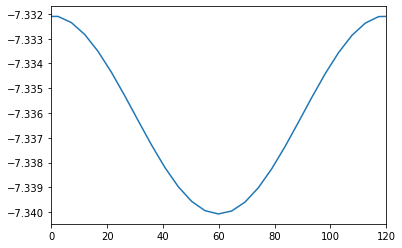

In [16]:
# As before:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(eth_dihedral[5], eth_energy[5])
ax.set_xlim(0, 120)


# Customising the plot

## Markers

It is important to realise that when Matplotlib draws a 'curve', it is actually just drawing a straight line between points. 
If we want to modify how the curve looks to e.g. show where these points are, we can add a `marker=` argument.
There are a huge range of 
[markers available](https://matplotlib.org/stable/api/markers_api.html) but commonly we just want circles:

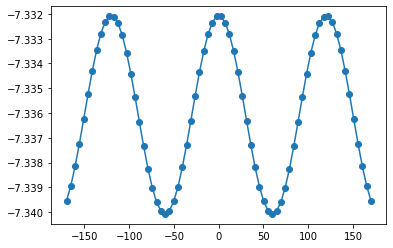

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(eth_dihedral[5], eth_energy[5], marker='o')


## Lines

Similarly, we can modify the line using `linestyle=`. You can pick from a [range of default](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) lines, 
and even [design your own](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)! Note that `linestyle=''` will remove the line completely.

## Colours ('Colors')
As you might expect, you can also adjust the colours of both markers and lines. Specifying the `color=` argument you can change the colour of both markers and lines at the same time.[<sup>4</sup>](#fn_colours)<span id='rt_colours'></span>



Colours in Matplotlib can be specified in a number of ways (and applied to most parts of the plot). The most commonly used colours are defined by a single-letter string:
- 'k' = <span style="color:black">black</span>
- 'r' = <span style="color:red;">red</span>
- 'b' = <span style="color:blue">blue</span>
- 'g' = <span style="color:green">green</span>
- 'c' = <span style="color:cyan">cyan</span>
- 'm' = <span style="color:magenta">magenta</span>
- 'y' = <span style="color:yellow">yellow</span>
- 'w' = <span style="color:white">white</span>

Additionally, the default sequence of colours used by Matplotlib can be accessed manually using
<span style="color:#1f77b4">C0</span>,
<span style="color:#ff7f0e">C1</span>,
<span style="color:#2ca02c">C2</span>, ...
<span style="color:#17becf">C9</span> (these are more muted than the colours above, and are chosen to give a similar brightness and be colour-blind firendly).


For a wider range of colours, you can also specify a lot [by name](https://matplotlib.org/stable/gallery/color/named_colors.html) such as <span style="color:orange">'orange'</span> or <span style="color:mediumorchid">'mediumorchid'</span>. If this still doesn't meet your needs, you can even define a colour using the proportions of red, green and blue (r,g,b) such as (0.5,0.7,0) and [many more ways](https://matplotlib.org/tutorials/colors/colors.html) besides!

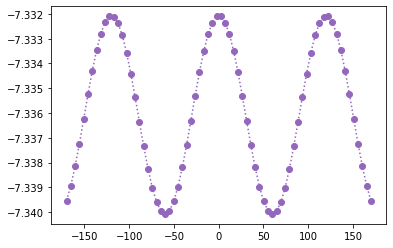

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(eth_dihedral[5], eth_energy[5], marker='o', linestyle=':', color='C4')


## Labelling
As I'm sure you have been told many times, a plot without labelling is almost meaningless! Within matplotlib, labelling is achieved by modifying the axes object (e.g. `ax`) using a string:
``` Pyton
ax.set_xlabel('My x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('Does my graph really need a title?!')
```

These can be customised in many ways, such as including a `fontsize = 14.0` argument.All text on a plot can be modified in similar and myriad ways - see [here](https://matplotlib.org/stable/tutorials/text/text_props.html) for too much detail.

If you want to add text within your axes (for instance to label something) you can use `ax.text` or `ax.annotate`.


### LaTeX formatting
Frequently, scientific plots require sub- or superscripted numbers, such as cm$^{-1}$ or CH$_3$CH$_2$OH. This can be achieved in matplotlib text using LaTeX (pronounced Lay-Tech) notation, denoted by dollar signs (the same also works in Markdown cells in Jupyter). [LaTeX](https://www.latex-project.org/) is too big to cover in this course (it is a programming language in its own right!) but some key points are:



- Anything between dollar signs \\$...\\$ is interpreted as LaTeX by matplotlib
- Curly brackets are special, and act to 'group' parts together
- Superscripts are denoted by a caret (^), e.g. \\$La^{3+}\\$ = $La^{3+}$
- Subscripts are denoted by an underscore (_) e.g. \\$CO_2\\$ = $CO_2$
- Greek characters are accessed using a backslash followed by their name: \\$\alpha\\$ = $\alpha$
    - Capitalise the first letter to get the uppercase version, e.g. \\$\delta\\$ ($\delta$) vs \\$\Delta\\$ ($\Delta$)
- Text is italic by default, but can be changed with \mathrm{}, e.g. $CO_2$ vs. $\mathrm{CO_2}$
    
The [matplotlib documentation](https://matplotlib.org/stable/tutorials/text/mathtext.html) has many more examples.

## Adding Legends

For plots containing more than one data set, it is a good idea to include a legend. The easiest way to do this is to pass a `label = ` argument when plotting each curve, and then generating the legend at the end using `ax.legend()`. The most useful parameter for `ax.legend` is `loc` which controls the location (the default is to find the position 1-10 which overlaps least with the data).


![Matplotlib legend placement codes](./images/matplotlib_legend_placement.png)

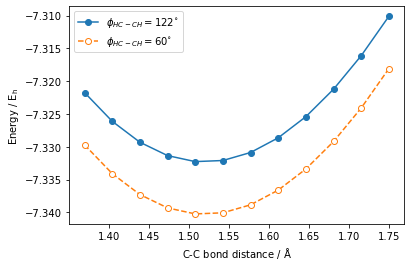

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(eth_CCdist[:,61],
        eth_energy[:,61],
        marker='o',
        linestyle='-',
        color = 'C0',
        label='$\phi_{HC-CH} = 122^{\circ}$'
       )


ax.plot(eth_CCdist[:,48],
        eth_energy[:,48],
        marker='o',
        linestyle='--',
        color = 'C1',
        mfc='w',
        label='$\phi_{HC-CH} = 60^{\circ}$'
        )

ax.set_xlabel('C-C bond distance / $\mathrm{\AA}$')
ax.set_ylabel('Energy / $\mathrm{E_h}$')

ax.legend(loc='upper left')




## Making plots accessible
### Colour
Approximately 1 in 20 people have some form of colorblindness, such that some colours appear more similar than they would to someone with 'normal' colour vision.

> In this class, this would suggest 6 or 7 people have colorblindness!

A helpful introduction to colorblindness can be found [here](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FF742C-%2302AF49), including an interactive "colorblindness simulator".

When creating plots, it is important to make them accessible to as many people as possible. Ideally, they should be easily understood regardless of how they are viewed (e.g. on screen or printed in black & white) and by whom (e.g. colorblind or not).

As a general rule, information should be conveyed by more than one visual aspect. For example:
- To distinguish curves, use a combination of colour **and** line style
- For scatter plots, use colour **and** marker shape
- Make use of filled/empty symbols (by setting `mfc = 'white'`)

If things must be distinguished by colour alone, avoid combining <span style='color:red;'>red</span> and <span style='color: green;'>green</span>, as this is the most common form of colorblindness. For any final plots, it can be useful to run them through a [colorblindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)


### Other accessibility issues

Colour is only one of the ways that a plot can become inaccessible (but is easy to fix). Graphs are most inaccessible to those with visual impairments, so some other things to consider are:


- Making fonts large enough to be easily discerned
- Include 'alternative text' descriptions of any plots so that people using screen-reading software can still interpret the data
    - Include a meaningful figure caption
    - Consider including the plotted data in a tabular form, perhaps in an appendix
    - Add text-based descriptions of images, e.g.
    ```markdown
    ![Pie chart of the amount of time spent on different activities while programming](https://i.pinimg.com/736x/7c/8c/6b/7c8c6b92d0fecdc9a1e0e20ceba9913d.jpg)`
    ```


- (Advanced) alternative ways to present information, such as sonification (representing data as sound, e.g. [SoniPy](https://www.sonification.com.au/sonipy/index.html))

# Task 2 - Plotting

`acid_base_titration.csv` contains the variation of pH with volume of titrant added (in mL) for three different acid-base titrations (A, B, C).

- read in the data file using pandas
- plot the data for each reaction on the same axes, using different colours and linestyle for each
- Don't forget to label your axes and add a legend

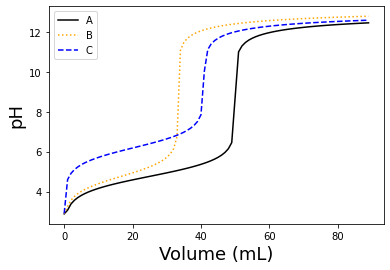

In [20]:
### begin answer
# Read in the data to a DataFrame
titration = pd.read_csv('data_sources/acid_base_titration.csv', index_col = 0)

# Generate the plot
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(titration['vol'], titration['pH_A'], linestyle='-', c='k', label='A')
ax.plot(titration['vol'], titration['pH_B'], linestyle=':', c='orange', label='B')
ax.plot(titration['vol'], titration['pH_C'], linestyle='--', c='blue', label='C')
ax.set_xlabel('Volume (mL)', fontsize=18)
ax.set_ylabel('pH', fontsize=18)

ax.legend()
### end answer

## Advanced tasks
- Based on the data in `acid_base_titration.csv`, how would you (programmatically) determine the end point of the titration?
- How could you add horizontal/vertical lines to the above plot to make it clear what volume/pH the end point occurs at?
- See if you can combine your answers to the previous questions to create an automatic titration analysis/plotting function(s)!

# Types of plot

Matplotlib gives access to many different types of plot, some of which you may never need to use! Here we will summarise the most important.

## Line or scatter plot

For many chemistry applications, you just want a simple *x* vs. *y* plot, either as a set of data points or a continuous line/curve. In this case, you would typically use `ax.plot(x,y)`, modifying the `linestyle` and `marker` as seen above. 

Matplotlib also offers the `ax.scatter(x,y)` method. This produces the same result as `ax.plot(x,y, linestyle='')` but is actually slower to plot! The reason to use `ax.scatter` is when you want to modify either the size (`s`) or colour (`c`) of your data points to show extra information.

For example, imagine you wanted to investigate whether there is any dependence of melting points on the relative amounts of C, H and O in the molecule. One way to do this might be to plot the H/C and O/C ratios on separate axes (a 'van Krevelen plot'), while also showing the melting point by colour:



In [21]:
MP_dat = pd.read_csv('data_sources/melting_points.csv', converters={'form_dict':eval})
MP_dat.head()

name     formula  \
0  2-(2,4-dinitrobenzyl)pyridine   C12H9N3O4   
1       2-(1-piperidinyl)aniline  C11H16N2O0   
2    2-(1-piperazinyl)pyrimidine   C8H12N4O0   
3        2-(1-piperazinyl)phenol  C10H14N2O1   
4   2-(1-cyclohexenyl)ethylamine   C8H15N1O0   

                            form_dict       H/C       O/C    mpC  
0   {'C': 12, 'N': 3, 'O': 4, 'H': 9}  0.750000  0.333333   92.0  
1          {'C': 11, 'N': 2, 'H': 16}  1.454545  0.000000   46.0  
2           {'C': 8, 'N': 4, 'H': 12}  1.500000  0.000000   33.0  
3  {'C': 10, 'N': 2, 'O': 1, 'H': 14}  1.400000  0.100000  125.0  
4           {'C': 8, 'N': 1, 'H': 15}  1.875000  0.000000  -55.0

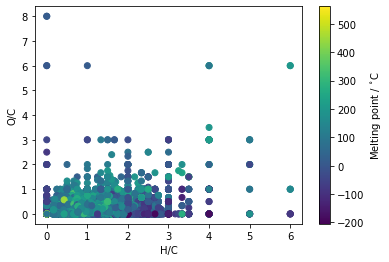

In [22]:
fig = plt.figure()
ax = fig.add_subplot()

colours = ax.scatter(x = MP_dat['H/C'], y = MP_dat['O/C'], c = MP_dat['mpC'])
ax.set_xlabel('H/C')
ax.set_ylabel('O/C')

fig.colorbar(colours, ax=ax, label='Melting point / $^{\circ}$C')

#ax.set_xlim(0,1)
#ax.set_ylim(0,1)


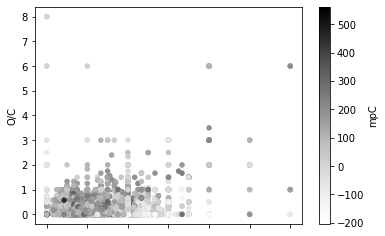

In [23]:
# Note, we could also achieve this using the Pandas plotting interface.
# Here, we don't have to manually place the colorbar (but do have to accept default settings).
MP_dat.plot(kind='scatter', x = 'H/C', y='O/C', c = 'mpC')


## Bar plots

Bar plots are useful when you want to show quantities for different categories, or to compare categories between different sets of data. An example could be representing the number and types of atoms in a molecule. Comparing bars between two or more data sets can be achieved by placing bars adjacent to one another, or stacking them up; the latter makes more sense if the combined total across the data has some meaning.



For example, suppose we want to determine how commonly each element occurs in our melting point data.

In [24]:
def element_distribution(formulae):
    """ Determine which elements occur with what frequency. """
    
    element_totals = {}
    
    for molecule in formulae:
        for element in molecule:
            if element in element_totals:
                element_totals[element] += molecule[element]
            else:
                element_totals[element] = molecule[element]
    
    return element_totals

{'C': 320276, 'N': 27946, 'O': 56538, 'H': 373273, 'Si': 349, 'S': 3975, 'Cl': 8099, 'F': 7552, 'B': 242, 'I': 679, 'Br': 2760, 'P': 504, 'Se': 10, 'Hg': 2, 'Zn': 1, 'As': 4, 'Co': 1, 'Mg': 1, 'Na': 1, 'Pb': 1, 'Al': 1, 'Ti': 1}


Text(0, 0.5, 'Count')

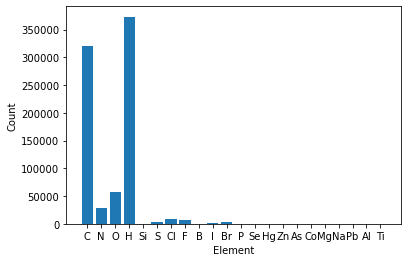

In [25]:
element_totals = element_distribution(MP_dat['form_dict'])

print(element_totals)

fig = plt.figure()
ax = fig.add_subplot()
ax.bar(element_totals.keys(), element_totals.values())
ax.set_xlabel('Element')
ax.set_ylabel('Count')



Suppose we want to compare how elements are distributed across groups/periods of the periodic table. The total across a group has a meaning on it's own, so we might want to stack the bars:

In [26]:
# First, rearrange the data into a better format for plotting
# We can imagine the periodic table as 6 lists (periods), each containing 18 values (groups). 
# The values represent how many of that element type are present in the data.
periods = {}
for row in range(1,7):
    periods[row] = [0] * 18

for symbol in element_totals:
    # Determine period of element using mendeleev
    element = mendeleev.element(symbol)
    period_id = element.period
    group_id = element.group_id - 1
    periods[period_id][group_id] = element_totals[symbol]
    
periods

{1: [373273, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 242, 320276, 27946, 56538, 7552, 0],
 3: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 349, 504, 3975, 8099, 0],
 4: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 10, 2760, 0],
 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 679, 0],
 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0]}

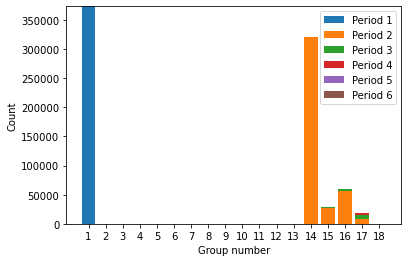

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

# To stack bars, we can define the where the bottom of each bar should start
# (we are summing values as we go, starting at 0).
starting_heights = [0]*18

for row in range(1,7):
    ax.bar(range(1,19), periods[row], label='Period '+str(row), bottom=starting_heights)
    
    for index in range(len(starting_heights)):
        starting_heights[index] += periods[row][index]
    
# Because C and H dominate the counts, we can use a log scale to emphasise small bars
#ax.set_yscale('log')

# We can manually define where ticksmarks should be placed:
ax.set_xticks(range(1,19))

ax.set_xlabel('Group number')
ax.set_ylabel('Count')
ax.legend()

## Histograms
A histogram is a specific type of bar graph, where numerical data are divided into discrete ranges ('bins') and the count of values within each bin is plotted as a bar chart. These two operations (performing 'binning' and then plotting the results) are easily achieved using matplotlib's `ax.hist` method.

Looking at our melting point data again, suppose we wanted to see what sort of range and distribution of melting points we have across the data; a histogram is perfect for this: 


Text(0, 0.5, 'Count')

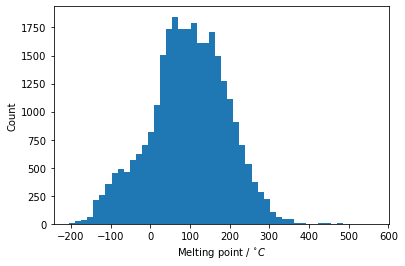

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(MP_dat['mpC'], bins=50)
ax.set_xlabel('Melting point / $^{\circ}C$')
ax.set_ylabel('Count')


Note that as well as producing the plot, matplotlib also returns the counts and position for each bin. If we wanted to save these for later, we can do
```
counts, bins, ax = ax.hist(data, bins=50)
```

# Two-dimensional plots

On some occasions you need to show the relationship between three variables, but a coloured scatter plot is not suitable (perhaps there are too many overlapping points). In this case, two types of plot are often useful: `ax.imshow` and `ax.contour`. 

`ax.imshow` : takes equally-spaced data arranged on a two-dimensional grid and plots the third value as colour

`ax.contour` : processes X,Y,Z data to produce contours of equal Z value, and plots them.

Going back to our ethane potential energy data, we have the molecular energy calculated for equally-spaced steps for both rotating around the C-C bond and changing the C-C distance :
![](./images/ethane_variations.png)

The calculated energies are already in a two-dimensional form,[<sup>5</sup>](#fn_numpy) <span id='rt_numpy'></span> so can be passed straight to `imshow`.

By default `imshow` produces square pixels, but this can be changed using `aspect =`. Note also that the image origin is placed at the top left by default, but this can be changed with `origin = 'lower'`. To change the $x$ and $y$ scales from 'pixel' coordinates to realistic values, we must define the value of the maximum and minimum along each dimensions using `extent = [x_min, x_max, y_min, y_max]`.


Text(0, 0.5, 'C-C bond distance / $\\mathrm{\\AA}$')

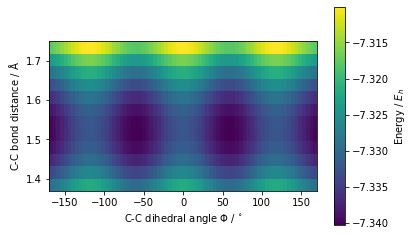

In [29]:
phi_min = -170
phi_max = 170
CC_min = 1.37
CC_max = 1.75

fig = plt.figure()
ax = fig.add_subplot()
colours = ax.imshow(eth_energy,
          extent = [phi_min, phi_max, CC_min, CC_max],
          origin='lower',
          aspect=500,
         )

fig.colorbar(colours,
             ax = ax,
             label='Energy / $E_h$')

ax.set_xlabel('C-C dihedral angle $\Phi\ /\ ^{\circ}$')
ax.set_ylabel('C-C bond distance / $\mathrm{\AA}$')


Because we also have the values of  of the dihedral angle and C-C distance at each grid point (as `eth_CCdist` and `eth_dihedral` respectively) we can generate a contour plot using `ax.contour(X_grid,Y_grid,Z_grid)`:

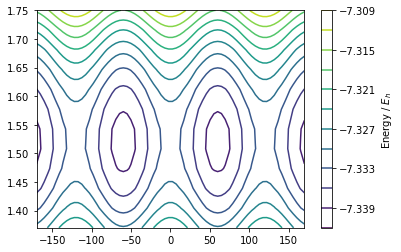

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
colours = ax.contour(eth_dihedral, eth_CCdist, eth_energy, levels=10)

fig.colorbar(colours, label='Energy / $E_h$')

# Tasks 3

1. Add a column to the `MP_dat` DataFrame which contains the formula weight of each compound.
> Hint: Write a function that takes the `form_dict` column, and multiplies the number of each element by its weight.
To help you, the `element_weights` dictionary in the cell below contains the atomic weight of each element.

In [31]:
# Generate dictionary of formula weights
element_weights = {}
for elem in mendeleev.get_all_elements():
    element_weights[elem.symbol] = elem.atomic_weight
    

In [32]:
### begin answer
def fw_from_formdict(formdict):
    """ Compute a formula weight based on a formula dictionary. """

    fw = 0
    for elem in formdict:
        fw += element_weights[elem] * formdict[elem]
        
    return  fw
    
# Calculate fw for each row
for row in MP_dat.index:
    MP_dat.loc[row, 'fw'] = fw_from_formdict(MP_dat.loc[row, 'form_dict'])

### end answer

In [33]:
### begin answer
# NOTE: if you're applying the same function to every row in a DataFrame column, you can use the pandas `apply` method,
# which returns a pandas Series (and is generally faster):
MP_dat['fw'] = MP_dat['form_dict'].apply(fw_from_formdict)
### end answer

2. Using the data in `MP_dat`, plot a scatter graph showing the dependence of melting point on formula weight

Text(0, 0.5, 'Melting Point / $^{\\circ} \\mathrm{C}$')

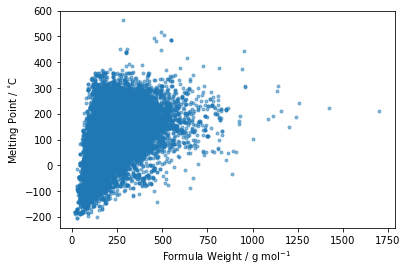

In [34]:
### begin answer
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(MP_dat['fw'], MP_dat['mpC'], marker='.', linestyle='', alpha=0.5)
ax.set_xlabel('Formula Weight / $\mathrm{g\ mol^{-1}}$')
ax.set_ylabel('Melting Point / $^{\circ} \mathrm{C}$')
### end answer

3. Plot a histogram of the distribution of Formula weights across all the compounds. Adjust the x-axis so the plot focusses on the majority of the distribution.

(0.0, 700.0)

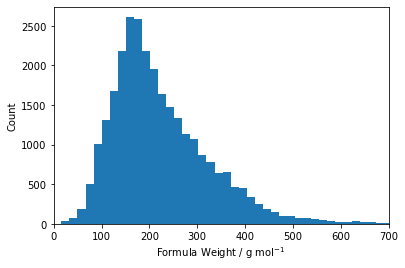

In [35]:
### begin answer
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(MP_dat['fw'], bins=100)
ax.set_xlabel('Formula Weight / $\mathrm{g\ mol^{-1}}$')
ax.set_ylabel('Count')
ax.set_xlim(0, 700)
### end answer

4. Plot a **stacked** histogram showing the distribution of melting points for
    - (a) molecules less than 200 g mol<sup>-1</sup>, and
    - (b) molecules greater (or equal to) 200 g mol<sup>-1</sup>.

Overall, the shape of your histogram should be the same as the histogram of all melting points shown earlier.
    
> Hint: There are many ways to achieve this, but one suggestion is to pre-define a set of bins to use for both distributions (using `np.arange`), calculate the histograms manually (using `np.histogram`) and then plot both results as a stacked bar chart, remembering to set the 'bottoms' of the second plot to the values of the first. Remember you'll need to slice your DataFrame using Boolean indexing!



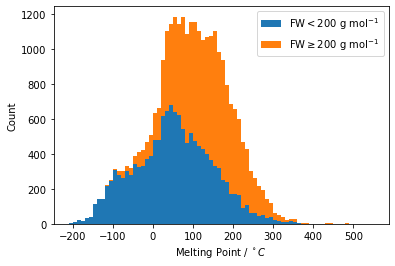

In [36]:
### begin answer
# Determine our bins based on the max/min MPs.
# Note that np.arange ignores the 
minMP = MP_dat['mpC'].min()
maxMP = MP_dat['mpC'].max()
bins = np.arange(minMP, maxMP, 10)

# Compute histograms
counts_light, bins_light = np.histogram(MP_dat[MP_dat['fw'] < 200]['mpC'], bins=bins)
counts_heavy, bins_heavy = np.histogram(MP_dat[MP_dat['fw'] >= 200]['mpC'], bins=bins)

# Finally, generate figure
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(bins_light[:-1], counts_light, width=10, label='$\mathrm{FW < 200\ g\ mol^{-1}}$')
ax.bar(bins_heavy[:-1], counts_heavy, width=10, bottom=counts_light, label='$\mathrm{FW \geq 200\ g\ mol^{-1}}$')

ax.set_xlabel('Melting Point / ${^\circ} C$')
ax.set_ylabel('Count')

ax.legend()
### end answer

## Advanced tasks
- For your melting point vs formula weight plot, try colouring points by the number of different elements in each compound
- The points in the MP vs FW plot overlap significantly, making it difficult to see the distribution. Try to create a 2D histogram plot showing how many point occur in a given region
> Hint: Look into hexbin plots
- Try plotting the histogram of log(Formula Weight) to see how the shape changes

# Multiple Plots

Plot layout also covers placing multiple plots into a single figure, often as separate 'panels' (labelled a,b,c etc). Matplotlib can achieve this using a grid of 'subplots', via the `add_subplot` command.[<sup>6</sup>](#fn_subplot)<span id=rt_subplot></span> This command takes either three integers (num_rows, num_cols, index) or a single 3-digit integer comprising of the three numbers. Index is the location of the plot within the defined grid, where the top-left is *1* (not 0, as for `subplots`)[<sup>7</sup>](#fn_countsubplot)<span id=rt_countsubplot></span>. This allows you to specify an arrangement of equally-sized plots, and optionally make them have 'shared' axes (if you want to constrain them to have the same scale on adjacent plots). 

Note: When generating subplots, you will often need to increase the overall figure size to stop things getting too small. The figure size is specified as (width,height) **in inches** (the default is (6,4)).


![](./images/subplot_arrangement.png)

(0.4, 2.1)

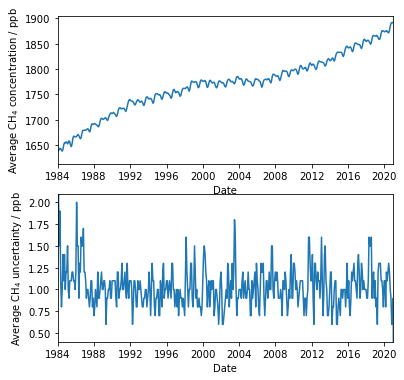

In [37]:
fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(2,1,1)    # Using (rows, cols, idx) format
ax1 = fig.add_subplot(2,1,2, sharex=ax0)      # Using 'single integer' format, and force ax0 and ax1 to have the same x-axis scale

ax0.plot(CH4dat['date'], CH4dat['average'])
#CH4dat.plot(x='date',y='average', ax=ax0)
ax0.set_xlabel('Date')
ax0.set_ylabel(r'Average CH$_4$ concentration / ppb')

ax1.plot(CH4dat['date'], CH4dat['average_unc'])
#CH4dat.plot(x='date',y='average_unc',  ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(r'Average CH$_4$ uncertainty / ppb')

# To set the limits on the date axis, we need to use the 'datetime' module
import datetime
ax1.set_xlim(datetime.date(1984,1,1),datetime.date(2020,12,1))
ax1.set_ylim(0.4,2.1)


# Complex plot layouts

`add_subplot` is good when you want multiple plots the same size and shape, for instance comparing the trend between different datasets. However, sometimes you want plots of different size and/or shape. Taking the example above, perhaps we want to see the derivate of the data shown above as well as the main curve, but we want the main data to dominate the plot. Ideally, this would still have two axes, but one much taller than the other. 
For more complex layouts, Matplotlib provides `gridspec` for exactly this purpose. It still uses `add_subplot` to generate each axis, but the format of the underlying grid is now determined by a `GridSpec` object which can contain much more information than the default grid. For example, in order to change the sizes of different parts of the grid, we can include `width_ratios` and `height_ratios` parameters.



Creating the axes is very similar to what we saw before, but now rather than using (nrows, ncols, index) we extract the appropriate part of the `GridSpec` object which has the format of a 2D NumPy array[<sup>8</sup>](#fn_numpy)<span id='rt_numpy2'></span> (top left is defined as [0,0]).


In [38]:
# Calculate the derivative (i.e. value[t+1] - value[t])
CH4dat['av_diff'] = CH4dat['average'].diff()

Text(0.5, 0, 'Date')

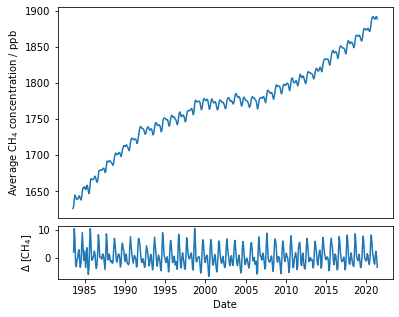

In [39]:
import matplotlib.gridspec

fig = plt.figure(figsize=(6,5))
# Create the underlying grid to format the axes. 
# height_ratios is a list of ratios the same length as the number of rows
spec = matplotlib.gridspec.GridSpec(ncols=1, 
                                    nrows=2, 
                                    figure=fig, 
                                    height_ratios=[4,1], 
                                    hspace=0.06,     # The default vertical space between plots is a bit large,
                                                    # so we can adjust it (use vspace for horizontal space)
                                   )

# Create the axes based on parts of the GridSpec object, and enforce the same x-axis.
ax0 = fig.add_subplot(spec[0,0])
ax1 = fig.add_subplot(spec[1,0], sharex=ax0)

# If we want to remove the x-labels from the upper panel:
ax0.xaxis.set_visible(False)

# Plot value
ax0.plot(CH4dat['date'], CH4dat['average'])
ax0.set_ylabel(r'Average CH$_4$ concentration / ppb')

# Plot derivative
ax1.plot(CH4dat['date'], CH4dat['av_diff'])
ax1.set_ylabel('$\Delta\ [\mathrm{CH_4}]$')

ax1.set_xlabel('Date')


## 'Infinite' flexibility...
Another powerful feature of `GridSpec` is that plots can span multiple 'cells' of the underlying grid, so you can create very complex plots quite quickly.

**This is for reference only, and you are not expected to do this!**


C:\Anaconda\envs\chem_teaching\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

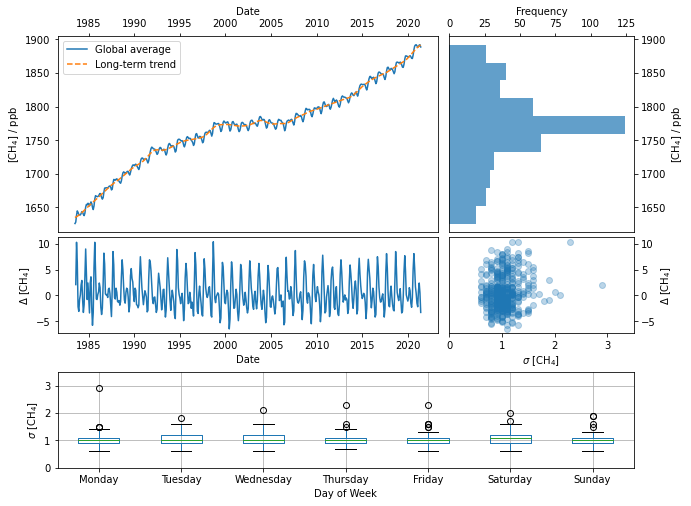

In [40]:
fig = plt.figure(figsize=(10,8))

# 5x3 grid is used, with the 4th row there to provide space for labels (with small height ratio)
spec = matplotlib.gridspec.GridSpec(ncols=3, 
                                    nrows=5, 
                                    figure=fig, 
                                    wspace=0.06,
                                    hspace=0.06,
                                    height_ratios=[1,1,1,0.3,1]
                                   )

# Big plot to span 4 grid cells
# This is an alternative approach to modifying height or width ratios for getting 
# different sized plots
ax_big = fig.add_subplot(spec[0:2, 0:2])    #Slicing of spec to enable spanning plots
ax_big.plot(CH4dat['date'],CH4dat['average'], label='Global average')
ax_big.plot(CH4dat['date'], CH4dat['trend'], linestyle='--', label='Long-term trend')
# move x-axis to top of plot
ax_big.xaxis.tick_top()
ax_big.set_xlabel('Date')
ax_big.xaxis.set_label_position('top')
ax_big.set_ylabel(r'$[\mathrm{CH_4}]$ / ppb')
ax_big.legend()

# we can name axes anything we want for clarity
ax_delta = fig.add_subplot(spec[2, 0:2], sharex=ax_big)
ax_delta.plot(CH4dat['date'], CH4dat['av_diff'])
ax_delta.set_xlabel('Date')
ax_delta.set_ylabel('$\Delta\ [\mathrm{CH_4}]$')

# This histogram shares its y axis with ax_big, but we also shift the
# labels to the right hand side
ax_right = fig.add_subplot(spec[0:2, 2], sharey = ax_big)
ax_right.hist(CH4dat['average'], orientation='horizontal', alpha=0.7)
ax_right.xaxis.tick_top()
ax_right.set_xlabel('Frequency')
ax_right.xaxis.set_label_position('top')
ax_right.yaxis.tick_right()
ax_right.set_ylabel(r'$[\mathrm{CH_4}]$ / ppb')
ax_right.yaxis.set_label_position('right')

# This is a scatter plot with modified x limits
ax_br = fig.add_subplot(spec[2,2], sharey = ax_delta)
ax_br.scatter(CH4dat['average_unc'], CH4dat['av_diff'], alpha=0.3)
ax_br.yaxis.tick_right()
ax_br.set_xlabel('$\sigma\ [\mathrm{CH_4}]$')
ax_br.yaxis.set_label_position('right')
ax_br.set_ylabel('$\Delta\ [\mathrm{CH_4}]$')
ax_br.set_xlim(0,3.5)

# The `:` syntax means this axis should span all columns
ax_bottom = fig.add_subplot(spec[4,:])
# Use some clever features of datetime to work out days of the week
CH4dat['dayofweek'] = CH4dat['date'].dt.dayofweek
# Use the pandas boxplot method for convenience and brevity (it doesn't seem to affect labels)
CH4dat.boxplot(column='average_unc', by='dayofweek', ax=ax_bottom)
ax_bottom.set_ylim(0,3.5)
ax_bottom.set_xlabel('Day of Week')
ax_bottom.set_ylabel('$\sigma\ [\mathrm{CH_4}]$')
# You can manually edit the labels of *all* tickmarks using a list
ax_bottom.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# Boxplot adds titles by default, so we reset them to blank
ax_bottom.set_title('')
fig.suptitle('')


# Summary

This session has covered many aspects of plotting, including:

- Which type(s) of plot to use for which data
- How to create plots that emphasise the science and are accessible
- Using matplotlib to generate different plot types
- Adding labels and legends
- Combining multiple plots in a single figure

## Further resources
If you ever get stuck with Matplotlib, they have some very helpful [cheatsheets](https://matplotlib.org/cheatsheets/), one of which is shown below:

![Matplotlib beginner cheat sheet](https://matplotlib.org/cheatsheets/handout-beginner.png)

# Feedback
If you could fill in the following Mentimeters with what aspects of this session you did or didn't like, that will help us to improve the course!

In [41]:
Mentimeter(vote = 'https://www.menti.com/fe598xggjw').show()

In [42]:
Mentimeter(vote = 'https://www.menti.com/nzpgnwmzat').show()

# Notes and References
<span id="footnotes">
<br>
    
<span id="fn_matplotlib"> 1. Matplotlib is the oldest and most popular Python plotting library, and will work in almost any python environment (Jupyter notebooks or command line/terminal). There are many others being developed, however; some use matplotlib "under the hood" but with some extra functionality (Pandas, Seaborn) while others are designed primarily for use in Jupyter notebooks, offering greater interactivity (e.g. Plotly, Bokeh, ...). I encourage you to explore other options if you're interested! </span>[Return](#rt_matplotlib)
    
<span id="fn_matlab"> 2. The 'stateless' approach to plotting is also more similar to the way Matlab produces plots, which you may have used before. </span>[Return](#rt_matlab)

<span id="fn_zoom"> 3. It is also possible to have an 'interactive' zoom (i.e. click and drag) within matplotlib plots, but in some cases this conflicts with Jupyter notebook formatting. To try it out, replace `%matplotlib inline` with `%matplotlib notebook` when importing `plt`. </span> [Return](#rt_zoom)
    
<span id="fn_colours"> 4. The markers actually have two colours: the `markeredgecolor` (`mec`) and `markerfacecolor` (`mfc`). By default, specifying `color=` when plotting will set `mfc` and `mec` to that colour, unless transparency (`alpha = `) is used (in which case only `mfc` is transparent). As with most things in Matplotlib, the colour of almost every plot element can be customised! [Return](#rt_colours)
    
<span id="fn_numpy"> 5. Try using `eth_energy.shape` to see the length in each dimension. This is a Numpy array format, which you will see more in session 6. [Return](#rt_numpy)
    
<span id="fn_subplot"> 6.</span> You can also create subplots using the `subplots` command which combines the figure and axes creation into a single step (which is useful for quick test plots):
``` Python
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,6))

```
Here, we are teaching `add_subplot` to make the step to more complex layouts a bit more logical. [Return](#rt_subplot)

    
<span id="fn_countsubplot"> 7. This is not very Pythonic! The reason is that Matplotlib was originally designed as an alternative to Matlab (which counts from 1).</span> [Return](#rt_countsubplot)
    
<span id="fn_numpy2"> 8. You will see NumPy in much more detail later in the course! </span> [Return](#rt_numpy2)
